# MASTER OF SCIENCE IN BUSINESS INTELLIGENCE AND ANALYTICS

### MANB2153 (MACHINE LEARNING FOR BUSINESS PROBLEMS) SEMESTER 2 SESSION 2017/ 2018


### LECTURER: DR. NILAM NUR AMIR SJARIF



#### ASSIGNMENT 1: SPAM DETECTION USING MACHINE LEARNING ALGORITHMS WITH PYTHON
#### Student: Nur Asiah Tuan Yaacob(MAN171051)

##### Start of Scripts

In [1]:
%matplotlib

Using matplotlib backend: Qt4Agg


In [50]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt # graphics package
import seaborn as sns
from IPython.display import display, HTML

In [51]:
#import dataset
SMS = pd.read_csv('C:\Users\NurAsiah\Desktop\spam.csv', encoding='latin-1')
SMS.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [52]:
SMS.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [53]:
#Drop the unwanted columns
SMS = SMS.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
print(SMS)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
10     ham  I'm gonna be home soon and i don't want to tal...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
12    spam  URGENT! You have won a 1 week FREE membership ...
13     ham  I've been searching for the right words to tha...
14     ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15    sp

In [54]:
#Rename columns
SMS = SMS.rename(columns = {"v1":"Label", "v2":"Data"})
print(SMS)

     Label                                               Data
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
10     ham  I'm gonna be home soon and i don't want to tal...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
12    spam  URGENT! You have won a 1 week FREE membership ...
13     ham  I've been searching for the right words to tha...
14     ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15    sp

In [55]:
#Exploration of label value
pd.value_counts(SMS["Label"])

ham     4825
spam     747
Name: Label, dtype: int64

In [56]:
print(SMS.dtypes)

Label    object
Data     object
dtype: object


In [57]:
SMS['Label'].unique()

array([u'ham', u'spam'], dtype=object)

In [58]:
#Check missing value/null
tab_info=pd.DataFrame(SMS.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(SMS.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(SMS.isnull().sum()/SMS.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_info)
print(tab_info)

,Label,Data
column type,object,object
null values (nb),0,0
null values (%),0,0


                   Label    Data
column type       object  object
null values (nb)       0       0
null values (%)        0       0


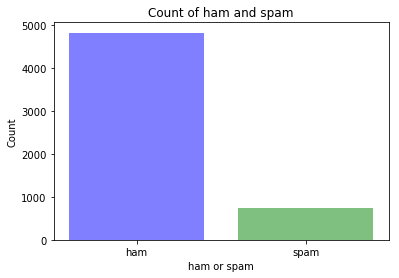

In [59]:
#Visualize data with bar chart
objects = ('ham', 'spam')
y_pos = np.arange(len(objects))
performance = [4825,747]
plt.bar(y_pos, performance, align='center', alpha=0.5, color=['b','g'])
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.xlabel('ham or spam')
plt.title('Count of ham and spam')
plt.show()

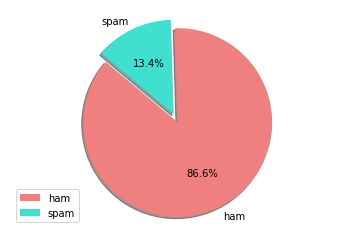

In [60]:
# Data to plot
labels = 'ham', 'spam'
sizes = [4825, 747]
colors = ['lightcoral', 'turquoise']
explode = (0.1, 0)  # explode 1st slice

# Visualize data with pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend(labels,loc=3)
plt.show()

In [61]:
SMS.groupby('Label').describe()

Data                                                               
      count unique                                                top freq
Label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [62]:
#Add a column: the length of the message
SMS['Length'] = SMS['Data'].apply(len)

In [63]:
SMS.tail(5)

,Label,Data,Length
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125
5571,ham,Rofl. Its true to its name,26


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000118E7588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011B29C18>], dtype=object)

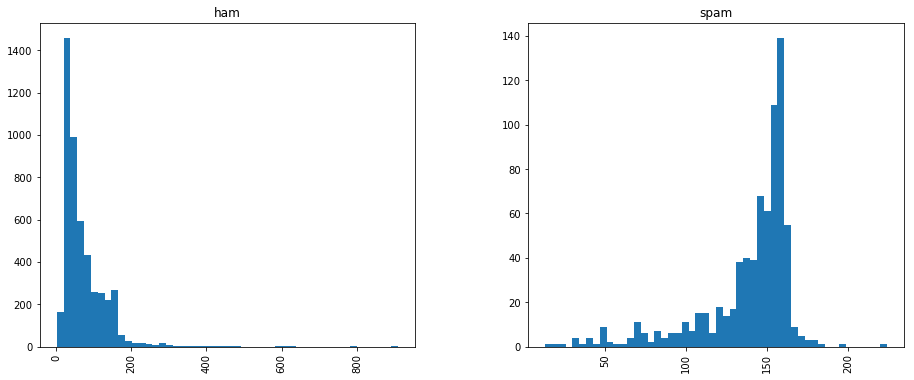

In [65]:
#Visualize the message lengths
SMS.hist(column='Length',by='Label',bins=50, figsize=(15,6))

In [66]:
#Label ham and spam messages with 0 and 1
SMS['Status'] = SMS.Label.map({'ham':0, 'spam':1})

In [67]:
SMS.head(5)

,Label,Data,Length,Status
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [70]:
#Show frequent words in ham and spam messages
from collections import Counter

CountH = Counter(" ".join(SMS[SMS['Label']=='ham']["Data"]).split()).most_common(30)
df1 = pd.DataFrame.from_dict(CountH)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})

CountS = Counter(" ".join(SMS[SMS['Label']=='spam']["Data"]).split()).most_common(30)
df2 = pd.DataFrame.from_dict(CountS)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

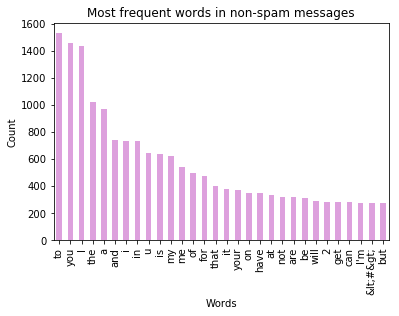

In [73]:
#Visualize the most frequent words in ham messages
df1.plot.bar(legend = False, color = 'plum')
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('Most frequent words in non-spam messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

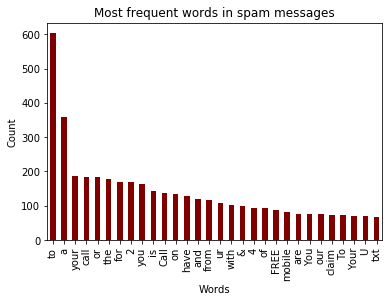

In [77]:
#Visualize most frequent words in spam messages
df2.plot.bar(legend = False, color = 'maroon')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('Most frequent words in spam messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [78]:
#Import tools
from sklearn import feature_extraction, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [79]:
#Import machine learning algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Import performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [80]:
#Specify the vectors
vectors = TfidfVectorizer(stop_words = 'english')
vectors2 = CountVectorizer(stop_words = 'english')

tfidf = vectors.fit_transform(SMS['Data'])
tf = vectors2.fit_transform(SMS['Data'])

#Splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(tfidf,SMS['Status'],test_size = 0.33, random_state = 15)
x_train1, x_test1, y_train1, y_test1 = train_test_split(tf,SMS['Status'],test_size = 0.33, random_state = 15)
model_ = ['NB','KN','SVC','DT','RF']
tfidf_result = []
tf_result = []

In [81]:
#Classify with Naive Bayes
model1 = MultinomialNB()

model1.fit(x_train, y_train)
tfidf_result.append(accuracy_score(y_test, model1.predict(x_test)))
print('tfidf:%f'% accuracy_score(y_test, model1.predict(x_test)))

model1.fit(x_train1, y_train1)
tf_result.append(accuracy_score(y_test1, model1.predict(x_test1)))
print('tf:%f' %accuracy_score(y_test1, model1.predict(x_test1)))

tfidf:0.970636
tf:0.972268


In [82]:
#Performance metrics for NB + TFIDF
print(classification_report(y_test, model1.predict(x_test)))
print(confusion_matrix(y_test, model1.predict(x_test)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1609
          1       0.97      0.90      0.94       230

avg / total       0.98      0.98      0.98      1839

[[1603    6]
 [  22  208]]


In [83]:
#Performance metrics for NB + TF
print(classification_report(y_test1, model1.predict(x_test1)))
print(confusion_matrix(y_test1, model1.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1609
          1       0.86      0.93      0.89       230

avg / total       0.97      0.97      0.97      1839

[[1573   36]
 [  15  215]]


In [84]:
 #Classify with K-Nearest Neighbor
model2 = KNeighborsClassifier()

model2.fit(x_train,y_train)
tfidf_result.append(accuracy_score(y_test, model2.predict(x_test)))
print('tfidf:%f'% accuracy_score(y_test, model2.predict(x_test)))

model2.fit(x_train1, y_train1)
tf_result.append(accuracy_score(y_test1, model2.predict(x_test1)))
print('tf:%f' %accuracy_score(y_test1, model2.predict(x_test1)))

tfidf:0.911909
tf:0.918978


In [85]:
#Performance metrics for KNN + TFIDF
print(classification_report(y_test, model2.predict(x_test)))
print(confusion_matrix(y_test, model2.predict(x_test)))

C:\Users\NurAsiah\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.87      1.00      0.93      1609
          1       0.00      0.00      0.00       230

avg / total       0.77      0.87      0.82      1839

[[1609    0]
 [ 230    0]]


In [86]:
#Performance metrics for KNN + TF
print(classification_report(y_test1, model2.predict(x_test1)))
print(confusion_matrix(y_test1, model2.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96      1609
          1       1.00      0.35      0.52       230

avg / total       0.93      0.92      0.90      1839

[[1609    0]
 [ 149   81]]


In [87]:
#Classify with Support Vector Machine
model3 = SVC()

model3.fit(x_train,y_train)
tfidf_result.append(accuracy_score(y_test, model3.predict(x_test)))
print('tfidf:%f'% accuracy_score(y_test, model3.predict(x_test)))

model3.fit(x_train1, y_train1)
tf_result.append(accuracy_score(y_test1, model3.predict(x_test1)))
print('tf:%f' %accuracy_score(y_test1, model3.predict(x_test1)))

tfidf:0.874932
tf:0.874932


In [88]:
#Performance metrics for SVM + TFIDF
print(classification_report(y_test, model3.predict(x_test)))
print(confusion_matrix(y_test, model3.predict(x_test)))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93      1609
          1       0.00      0.00      0.00       230

avg / total       0.77      0.87      0.82      1839

[[1609    0]
 [ 230    0]]


In [89]:
#Performance metrics for SVM + TF
print(classification_report(y_test1, model3.predict(x_test1)))
print(confusion_matrix(y_test1, model3.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93      1609
          1       0.00      0.00      0.00       230

avg / total       0.77      0.87      0.82      1839

[[1609    0]
 [ 230    0]]


In [90]:
#Classify wwith Decision Tree
model4 = DecisionTreeClassifier()

model4.fit(x_train, y_train)
tfidf_result.append(accuracy_score(y_test, model4.predict(x_test)))
print('tfidf:%f'% accuracy_score(y_test, model4.predict(x_test)))

model4.fit(x_train1, y_train1)
tf_result.append(accuracy_score(y_test1, model4.predict(x_test1)))
print('tf:%f' %accuracy_score(y_test1, model4.predict(x_test1)))

tfidf:0.966830
tf:0.960848


In [91]:
#Performance metrics for DT + TFIDF
print(classification_report(y_test, model4.predict(x_test)))
print(confusion_matrix(y_test, model4.predict(x_test)))

             precision    recall  f1-score   support

          0       0.88      1.00      0.93      1609
          1       0.29      0.01      0.02       230

avg / total       0.80      0.87      0.82      1839

[[1604    5]
 [ 228    2]]


In [92]:
#Performance metrics for DT + TF
print(classification_report(y_test1, model4.predict(x_test1)))
print(confusion_matrix(y_test1, model4.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1609
          1       0.85      0.83      0.84       230

avg / total       0.96      0.96      0.96      1839

[[1576   33]
 [  39  191]]


In [93]:
#Classify with Random Forest
model5 = RandomForestClassifier()

model5.fit(x_train,y_train)
tfidf_result.append(accuracy_score(y_test, model5.predict(x_test)))
print('tfidf:%f'% accuracy_score(y_test, model5.predict(x_test)))

model5.fit(x_train1, y_train1)
tf_result.append(accuracy_score(y_test1, model5.predict(x_test1)))
print('tf:%f' %accuracy_score(y_test1, model5.predict(x_test1)))

tfidf:0.974986
tf:0.978249


In [94]:
#Performance metrics for RF + TFIDF
print(classification_report(y_test, model5.predict(x_test)))
print(confusion_matrix(y_test, model5.predict(x_test)))

             precision    recall  f1-score   support

          0       0.88      1.00      0.93      1609
          1       1.00      0.01      0.02       230

avg / total       0.89      0.88      0.82      1839

[[1609    0]
 [ 228    2]]


In [95]:
#Performance metrics for RF + TF
print(classification_report(y_test1, model5.predict(x_test1)))
print(confusion_matrix(y_test1, model5.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1609
          1       0.98      0.84      0.91       230

avg / total       0.98      0.98      0.98      1839

[[1606    3]
 [  37  193]]


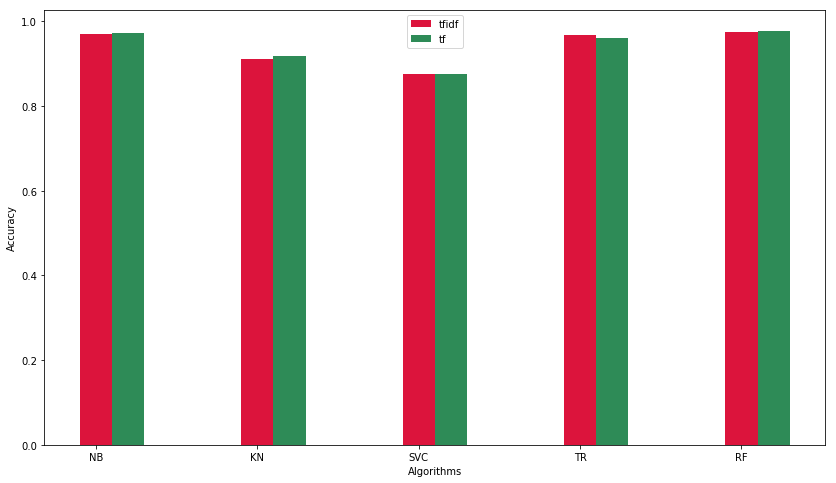

In [105]:
#Visualize the accuracy performance
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
width = 0.2
ind = np.arange(5)
ax.bar(ind,tfidf_result,width, label = 'tfidf', color = 'crimson')
ax.bar(ind + width, tf_result, width, label = 'tf', color = 'seagreen')
ax.set_xticklabels(('NB','NB','KN','SVC','TR','RF'))
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

In [106]:
#Conclusion: Random Forest classifier performs the best (in terms of accuracy percentage) within the range of 97.4% to 97.9%

##### End of Scripts